In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

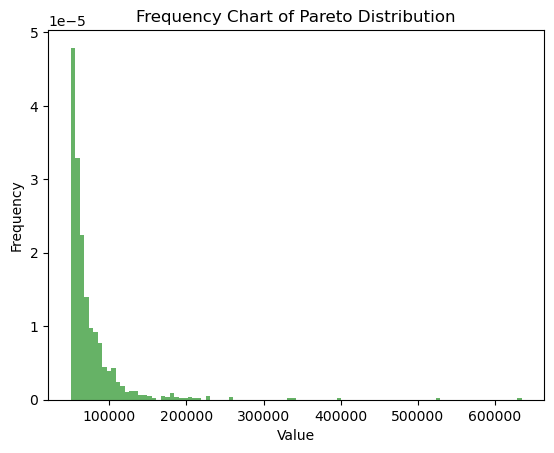

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
mean = 50000  # Mean
alpha = 3     # Shape parameter

# Generate random numbers following a Pareto distribution
random_numbers = np.random.pareto(alpha, 1000) + 1
random_numbers *= mean

# Create histogram
plt.hist(random_numbers, bins=100, density=True, alpha=0.6, color='g')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Chart of Pareto Distribution')

# Show plot
plt.show()


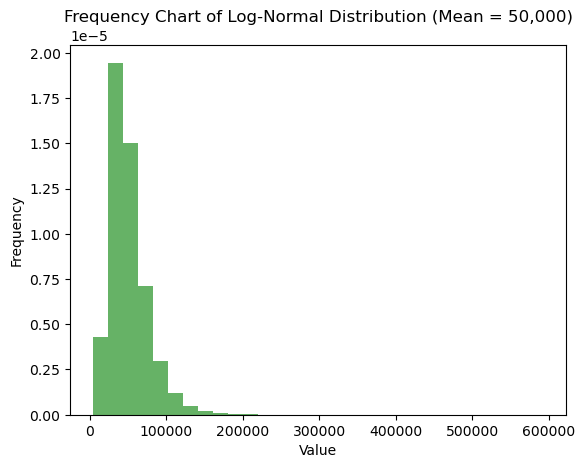

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the log-normal distribution
mean_X = 50000  # Desired mean
variance_X = 25000**2  # Desired variance (e.g., half of the mean squared)

# Calculate parameters for the log-normal distribution
mu_log = np.log(mean_X**2 / np.sqrt(mean_X**2 + variance_X))
sigma_log = np.sqrt(np.log(1 + variance_X / mean_X**2))

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, 27*(10**6))

# Create histogram
plt.hist(random_numbers, bins=30, density=True, alpha=0.6, color='g')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Chart of Log-Normal Distribution (Mean = 50,000)')

# Show plot
plt.show()


In [4]:


ubi = pd.read_excel("UBI Test.xlsx")

In [17]:
import numpy as np
import pandas as pd

# Parameters for the log-normal distribution
mean_X = 50000  # Desired mean
variance_X = 25000**2  # Desired variance (e.g., half of the mean squared)

# Calculate parameters for the log-normal distribution
mu_log = np.log(mean_X**2 / np.sqrt(mean_X**2 + variance_X))
sigma_log = np.sqrt(np.log(1 + variance_X / mean_X**2))

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, 27*(10**6))

# Define income range increments
income_increments = np.arange(0, max(random_numbers) + 1000, 1000)

# Create frequency table using NumPy's histogram function
frequencies, bins = np.histogram(random_numbers, bins=income_increments)

# Create a DataFrame from the frequency table
frequency_df = pd.DataFrame({'Income Range': [f'${int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)],
                             'Number of People': frequencies})

# Display the frequency table
print(frequency_df)


       Income Range  Number of People
0           $0-1000                 0
1        $1000-2000                 0
2        $2000-3000                 0
3        $3000-4000                 3
4        $4000-5000                45
..              ...               ...
585  $585000-586000                 0
586  $586000-587000                 0
587  $587000-588000                 0
588  $588000-589000                 0
589  $589000-590000                 1

[590 rows x 2 columns]


In [69]:
data = pd.DataFrame({'income': random_numbers})

data['category'] = pd.cut(data['income'], bins=bins, labels=frequency_df['Income Range'])

data['ubi_amount'] = 12000
data['tax'] = data['income'] * 0.2
data['net_transfer'] = data['ubi_amount'] - data['tax']
data['new_income'] = data['income'] + data['net_transfer']
data['new_category'] = pd.cut(data['new_income'], bins=bins, labels=frequency_df['Income Range'])
# Display the DataFrame
print(data)

                income      category  ubi_amount           tax  net_transfer  \
0         34442.119234  $34000-35000       12000   6888.423847   5111.576153   
1         18745.548049  $18000-19000       12000   3749.109610   8250.890390   
2         18293.693330  $18000-19000       12000   3658.738666   8341.261334   
3         29690.363814  $29000-30000       12000   5938.072763   6061.927237   
4         26418.479254  $26000-27000       12000   5283.695851   6716.304149   
...                ...           ...         ...           ...           ...   
26999995  77555.031742  $77000-78000       12000  15511.006348  -3511.006348   
26999996  65580.346408  $65000-66000       12000  13116.069282  -1116.069282   
26999997  44993.056226  $44000-45000       12000   8998.611245   3001.388755   
26999998  26912.730510  $26000-27000       12000   5382.546102   6617.453898   
26999999  77156.572655  $77000-78000       12000  15431.314531  -3431.314531   

            new_income  new_category  


In [70]:
frequency_new_category = data['new_category'].value_counts().reset_index()
frequency_new_category.columns = ['Income Range', 'Number of People']

# Sort the frequency table by income range
frequency_new_category = frequency_new_category.sort_values(by='Income Range')

# Display the frequency table
print(frequency_new_category)

       Income Range  Number of People
465         $0-1000                 0
512      $1000-2000                 0
500      $2000-3000                 0
501      $3000-4000                 0
502      $4000-5000                 0
..              ...               ...
424  $585000-586000                 0
423  $586000-587000                 0
422  $587000-588000                 0
421  $588000-589000                 0
589  $589000-590000                 0

[590 rows x 2 columns]


In [21]:
# Define a new DataFrame 'ubi' by dropping the rows where the income range is above 350,000
ubi = frequency_df.drop(frequency_df[frequency_df['Income Range'].str.split('-').str[-1].astype(int) > 350000].index)

# Display the new DataFrame
print(ubi)


       Income Range  Number of People
0           $0-1000                 0
1        $1000-2000                 0
2        $2000-3000                 0
3        $3000-4000                 3
4        $4000-5000                45
..              ...               ...
345  $345000-346000                13
346  $346000-347000                 7
347  $347000-348000                 4
348  $348000-349000                 4
349  $349000-350000                 6

[350 rows x 2 columns]


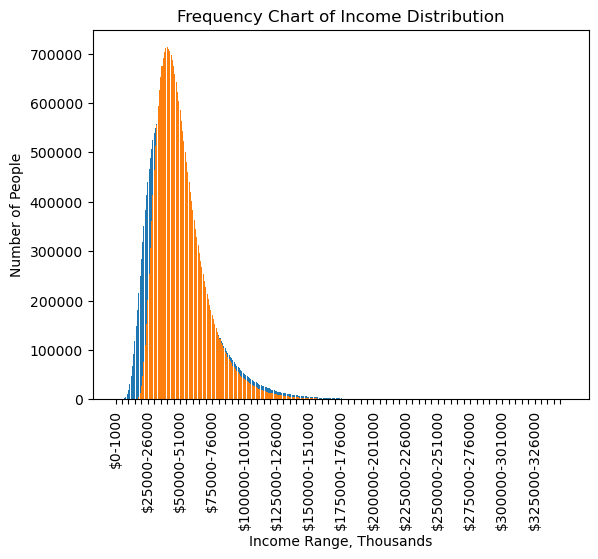

In [73]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.bar(range(len(ubi)), ubi["Number of People"])
plt.bar(range(len(ubi2)), ubi2["Number of People"])
# Set x-tick positions to every fifth element
plt.xticks(np.arange(0, len(ubi), 5))

tick_labels = [ubi["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(ubi),5)]
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.gca().set_xticklabels(tick_labels)

# Add labels and title
plt.xlabel('Income Range, Thousands')
plt.ylabel('Number of People')
plt.title('Frequency Chart of Income Distribution')

# Show plot
plt.show()


In [71]:
# Define a new DataFrame 'ubi2' by dropping the rows where the income range is above 350,000
ubi2 = frequency_new_category.drop(frequency_new_category[frequency_new_category['Income Range'].str.split('-').str[-1].astype(int) > 350000].index)

# Display the new DataFrame
print(ubi2)


       Income Range  Number of People
465         $0-1000                 0
512      $1000-2000                 0
500      $2000-3000                 0
501      $3000-4000                 0
502      $4000-5000                 0
..              ...               ...
325  $345000-346000                 1
521  $346000-347000                 0
522  $347000-348000                 0
322  $348000-349000                 1
523  $349000-350000                 0

[350 rows x 2 columns]


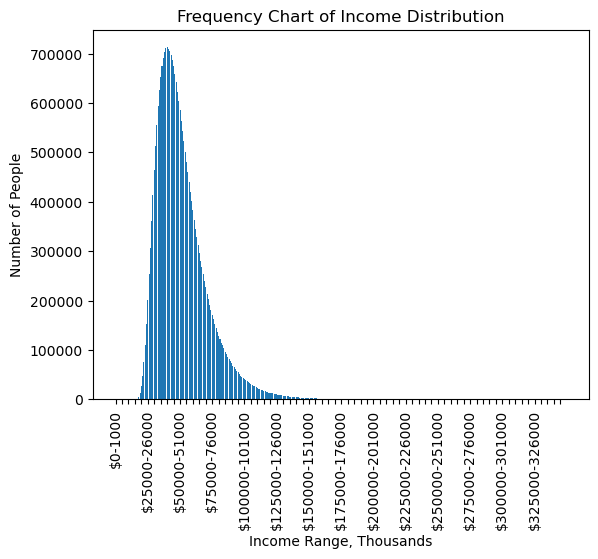

In [72]:
# Plot the bar chart
plt.bar(range(len(ubi2)), ubi2["Number of People"])
# Set x-tick positions to every fifth element
plt.xticks(np.arange(0, len(ubi2), 5))

tick_labels = [ubi["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(ubi2),5)]
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.gca().set_xticklabels(tick_labels)

# Add labels and title
plt.xlabel('Income Range, Thousands')
plt.ylabel('Number of People')
plt.title('Frequency Chart of Income Distribution')

# Show plot
plt.show()